## Getting bamCoverage on the trimmed cellranger count bam files

## Run STAR with the same parameters cellranger used
STAR_2.5.1b was used
### Concatenate fastq

In [9]:
import os
from os.path import join, basename, dirname
import pandas as pd
import glob

In [11]:
primer_dir = "../BWA-Primers-MT/"
glob.glob(primer_dir+"/*")

['../BWA-Primers-MT/Primers add non-poly(dT) tag.ipynb',
 '../BWA-Primers-MT/final_primers.csv.bed',
 '../BWA-Primers-MT/__pycache__',
 '../BWA-Primers-MT/96-Primers.ipynb',
 '../BWA-Primers-MT/alignment.py',
 '../BWA-Primers-MT/96-Primers.fasta',
 '../BWA-Primers-MT/final_primers_withAllOld.csv',
 '../BWA-Primers-MT/final_primers.xls.sb-a9edeefd-efbB6m',
 '../BWA-Primers-MT/96-Primers-Alignment.xlsx',
 '../BWA-Primers-MT/Convert primers to bed .ipynb',
 '../BWA-Primers-MT/gene length.ipynb',
 '../BWA-Primers-MT/final_primers_withAllOld_with_tag.csv',
 '../BWA-Primers-MT/final_primers_withAllOld.csv.bed',
 '../BWA-Primers-MT/images',
 '../BWA-Primers-MT/96-Primers.xlsx',
 '../BWA-Primers-MT/MT_genome',
 '../BWA-Primers-MT/Gene lengths',
 '../BWA-Primers-MT/Gene_lengths.csv',
 '../BWA-Primers-MT/96-Primers Isaac.ipynb',
 '../BWA-Primers-MT/final_primers.csv',
 '../BWA-Primers-MT/final_primers_with_tag.csv',
 '../BWA-Primers-MT/final_primers.xls.sb-a9edeefd-IPcWRf']

In [14]:
pd.read_csv('../BWA-Primers-MT/Gene_lengths.csv')

,Id,Type,Start,End,Strand,Location,Length
0,gene60922,gene,577,647,+,NC_012920.1,71
1,gene60923,gene,648,1601,+,NC_012920.1,954
2,gene60924,gene,1602,1670,+,NC_012920.1,69
3,gene60925,gene,1671,3229,+,NC_012920.1,1559
4,gene60926,gene,3230,3304,+,NC_012920.1,75
5,gene60927,gene,3307,4262,+,NC_012920.1,956
6,gene60928,gene,4263,4331,+,NC_012920.1,69
7,gene60929,gene,4329,4400,-,NC_012920.1,72
8,gene60930,gene,4402,4469,+,NC_012920.1,68
9,gene60931,gene,4470,5511,+,NC_012920.1,1042


In [7]:
pd.read_csv("../BWA-Primers-MT/final_primers.csv")

,Name,Sequence 5',Gene,Strand,MT Position
0,gene60922_0,TGTTTATGGGGTGATGTGAG,gene60922,-,646
1,gene60923_349,CTGAGCAAGAGGTGGTGAGG,gene60923,-,1251
2,gene60923_830,TGCTGCGTGCTTGATGCTTG,gene60923,-,770
3,gene60923_499,TAGGGCTAAGCATAGTGGGG,gene60923,-,1101
4,gene60923_0,GTTCGTCCAAGTGCACTTTC,gene60923,-,1600
...,...,...,...,...,...
117,gene60956_981,GCATGGCTAGGAATAGTCCT,gene60956,-,14905
118,gene60956_831,AATATAGGCCTCGCCCGATG,gene60956,-,15055
119,gene60956_0,AGGCCCATTTGAGTATTTTG,gene60956,-,15886
120,gene60957_0,TGTCCTTGGAAAAAGGTTTT,gene60957,-,15952


In [13]:
pd.read_csv("../BWA-Primers-MT/final_primers.csv.bed", sep="\t", header=None)

,0,1,2,3,4,5
0,MT,646,666,gene60922_0,0,-
1,MT,1251,1271,gene60923_349,0,-
2,MT,770,790,gene60923_830,0,-
3,MT,1101,1121,gene60923_499,0,-
4,MT,1600,1620,gene60923_0,0,-
...,...,...,...,...,...,...
117,MT,14905,14925,gene60956_981,0,-
118,MT,15055,15075,gene60956_831,0,-
119,MT,15886,15906,gene60956_0,0,-
120,MT,15952,15972,gene60957_0,0,-


## File names

In [2]:
genomedir = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/star"
indir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/"

outdir = join(indir, "homebrew/")
if not os.path.exists(outdir):
    os.mkdir(outdir)
outdir = join(outdir, "bam/")
if not os.path.exists(outdir):
    os.mkdir(outdir)

    
ID = "bc5prime_A"
f1 = join(indir,"trimmed_BC_5Prime_031020_A_R1.concat.fastq")
f2 = join(indir,"trimmed_BC_5Prime_031020_A_R2.concat.fastq")

In [3]:
!which STAR

/home/isshamie/software/STAR-2.5.3a/bin/Linux_x86_64/STAR


## Run STAR and dont use R1 for mapping

In [7]:
def star_cmd(genomedir, r1,r2, outdir,ID):
    cmd = f"STAR --runThreadN 8  --genomeDir {genomedir}  --readFilesIn {r2} --outFileNamePrefix {join(outdir, ID+'.lowerParams')} --outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log   --outSAMattrRGline ID:{ID}:0:1:HC23FDSXY:3   SM:{ID} LB:0.1 PU:{ID}:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615"
    add_params = " --outFilterScoreMinOverLread 0.3 --outFilterMatchNminOverLread 0.3"
    cmd = cmd + add_params
    print(cmd)
    return cmd

#--readFilesCommand 'gunzip -c'
#--outSAMunmapped Within KeepPairs
#--outSAMorder PairedKeepInputOrder

## A.

In [6]:
indir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/"
A1_R1 = "trimmed_A_S1_L001_R1_001.fastq"
A1_R2 = "trimmed_A_S1_L001_R2_001.fastq"
ID = "A"

outdir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam"
if not os.path.exists(outdir):
    os.mkdir(outdir)

A1_R1 = join(indir,A1_R1)
A1_R2 = join(indir,A1_R2)

### Run STAR with parameters for matching lowered


#cmd = f"STAR --runThreadN 4  --genomeDir {genomedir} --readFilesCommand 'gunzip -c' --readFilesIn {A1_R2} --outFileNamePrefix {join(outdir, ID+'.lowerParams')} -–outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log --outSAMunmapped Within KeepPairs  --outSAMorder PairedKeepInputOrder --outSAMattrRGline ID:{ID}:0:1:HC23FDSXY:3   SM:{ID} LB:0.1 PU:{ID}:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615"
cmd = star_cmd(genomedir, A1_R1,A1_R2, outdir,ID)

# add_params = " --outFilterScoreMinOverLread 0.3 --outFilterMatchNminOverLread 0.3"
# cmd = cmd + add_params
# print(cmd)
!{cmd}

STAR --runThreadN 8  --genomeDir /data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/star --readFilesCommand 'gunzip -c' --readFilesIn /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/trimmed_A_S1_L001_R2_001.fastq.gz --outFileNamePrefix /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam/A.lowerParams --outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log   --outSAMattrRGline ID:A:0:1:HC23FDSXY:3   SM:A LB:0.1 PU:A:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615 --outFilterScoreMinOverLread 0.3 --outFilterMatchNminOverLread 0.3
May 18 20:09:52 ..... started STAR run
May 18 20:09:52 ..... loading genome
May 18 20:10:01 ..... started mapping
May 18 20:10:03 ..... started sorting BAM
May 18 20:10:03 ..... started wiggle output
[E::bam_hdr_read] invalid BAM binary header
[E::bam_hdr_read] invalid BAM binary header
May 18 20:10:03 ..... finished succes

## AD.

In [7]:
indir = "/data2/isshamie/mito_lineage/data/raw/200403_A00953_0090_BHC23FDSXY/trim/"
AD_R1 = "trimmed_AD_R1_concat.fastq.gz"
AD_R2 = "trimmed_AD_R2_concat.fastq.gz"
ID = "AD"

outdir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam"
if not os.path.exists(outdir):
    os.mkdir(outdir)

AD_R1 = join(indir,AD_R1)
AD_R2 = join(indir,AD_R2)

### Run STAR with parameters for matching lowered

# cmd = f"STAR --runThreadN 4  --genomeDir {genomedir}  --readFilesIn {AD_R2} --outFileNamePrefix {join(outdir, ID+'.lowerParams')} -–outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log --outSAMunmapped Within KeepPairs  --outSAMorder PairedKeepInputOrder --outSAMattrRGline ID:{ID}:0:1:HC23FDSXY:3   SM:{ID} LB:0.1 PU:{ID}:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615"

# add_params = " --outFilterScoreMinOverLread 0.3 --outFilterMatchNminOverLread 0.3"
# cmd = cmd + add_params
# print(cmd)

cmd = star_cmd(genomedir, AD_R1,AD_R2, outdir,ID)
!{cmd}

STAR --runThreadN 8  --genomeDir /data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/star --readFilesCommand 'gunzip -c' --readFilesIn /data2/isshamie/mito_lineage/data/raw/200403_A00953_0090_BHC23FDSXY/trim/trimmed_AD_R2_concat.fastq.gz --outFileNamePrefix /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam/AD.lowerParams --outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log   --outSAMattrRGline ID:AD:0:1:HC23FDSXY:3   SM:AD LB:0.1 PU:AD:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615 --outFilterScoreMinOverLread 0.3 --outFilterMatchNminOverLread 0.3
May 18 20:08:26 ..... started STAR run
May 18 20:08:26 ..... loading genome
gzip: /data2/isshamie/mito_lineage/data/raw/200403_A00953_0090_BHC23FDSXY/trim/trimmed_AD_R2_concat.fastq.gz: No such file or directory
May 18 20:08:34 ..... started mapping
May 18 20:08:36 ..... started sorting BAM
May 18 20:08:36 ..... started wiggle ou

## Run

## Bamcoverage

cmd = "mkdir bamcoverage"
cmd = 'bamCoverage -b bc5prime_fiveprime_A_1/outs/possorted_genome_bam.bam -o bamcoverage/bc5prime_fiveprime_A_1.bw -p 20'
cmd = "bamCoverage -b bc5prime_sc5p_pe_lanes/outs/possorted_genome_bam.bam -o bamcoverage/bc5prime_sc5p_pe_lanes -p 20"

In [ ]:
bamcoverage_dir = join(outdir,"bamcov")
for i in glob.glob(outidr + "/*.bam"):
    cmd =  f"bamCoverage {i} -o {join(bamcoverage_dir,basename(i)+'.bw')} -p 10"
    print(cmd)

## Plot mapq values (take first 60000)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
sam_f = "../data/processed/mttrace/A/00_bam/A.sam"
sam = pd.read_csv(sam_f,sep="\t",skiprows=10000,nrows=60000,header=None, comment="@",usecols=np.arange(6))
sam.head()

,0,1,2,3,4,5
0,A00953:90:HC23FDSXY:3:2524:26928:34695,1171,12,122981133,255,101M
1,A00953:90:HC23FDSXY:3:1403:24207:32487,163,12,123428838,255,89M12S
2,A00953:90:HC23FDSXY:3:1403:24207:32487,163,12,123428838,255,89M12S
3,A00953:90:HC23FDSXY:3:1650:16504:6590,163,12,123428838,255,89M12S
4,A00953:90:HC23FDSXY:3:1650:16504:6590,163,12,123428838,255,89M12S


In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'MAPQ')

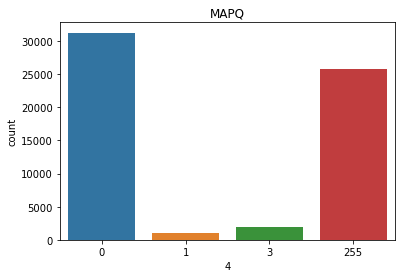

In [10]:
sns.countplot(sam[4])
plt.title("MAPQ")

In [ ]:
Read Name
SAM flag
chromosome (if read is has no alignment, there will be a “*” here)
position (1-based index, “left end of read”)
MAPQ (mapping quality — describes the uniqueness of the alignment, 0=non-unique, >10 probably unique)
CIGAR string (describes the position of insertions/deletions/matches in the alignment, encodes splice junctions, for example)
Name of mate (mate pair information for paired-end sequencing, often “=”)
Position of mate (mate pair information)
Template length (always zero for me)
Read Sequence
Read Quality
Program specific Flags (i.e. AS is an alignment score, NH is a number of reported alignments that contains the query in the current record)

In [15]:
unmapped = sam[sam[4] == 0]
unmapped


,0,1,2,3,4,5
9,A00953:90:HC23FDSXY:3:1275:25473:14700,419,12,124911769,0,15S61M
10,A00953:90:HC23FDSXY:3:1275:25473:14700,419,12,124911769,0,15S61M
19,A00953:90:HC23FDSXY:3:1428:16405:1658,419,12,124911922,0,14S62M
21,A00953:90:HC23FDSXY:3:1275:25473:14700,419,12,124911997,0,15S61M
22,A00953:90:HC23FDSXY:3:2350:10041:20071,419,12,124912052,0,101M
...,...,...,...,...,...,...
59995,A00953:90:HC23FDSXY:3:2171:23737:36245,77,*,0,0,*
59996,A00953:90:HC23FDSXY:3:2171:23737:36245,141,*,0,0,*
59997,A00953:90:HC23FDSXY:3:2202:29722:9972,77,*,0,0,*
59998,A00953:90:HC23FDSXY:3:2202:29722:9972,141,*,0,0,*


In [18]:
print(f"Number of duplicated reads: {unmapped[0].duplicated().sum()}")

Number of duplicated reads: 27094


In [20]:
print(f"Number of reads mapped to *: {(unmapped[2]=='*').sum()}")

Number of reads mapped to *: 5775


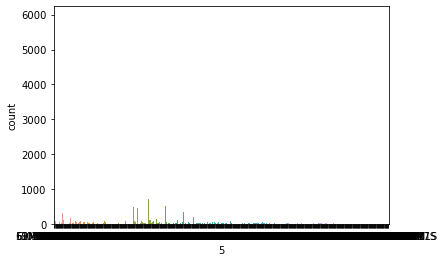

In [21]:
sns.countplot(unmapped[5])

In [35]:
(~sam[sam[4] == 0].duplicated()).sum()

26305

In [37]:
((~sam[sam[4] == 0].duplicated()) & ~(sam[2]=="*")).sum()

20909

In [32]:
sam[(sam[4] == 0) & (sam[2] == "*")]

,0,1,2,3,4,5
54225,A00953:90:HC23FDSXY:3:1102:10755:20744,77,*,0,0,*
54226,A00953:90:HC23FDSXY:3:1102:10755:20744,141,*,0,0,*
54227,A00953:90:HC23FDSXY:3:1104:11912:30671,77,*,0,0,*
54228,A00953:90:HC23FDSXY:3:1104:11912:30671,141,*,0,0,*
54229,A00953:90:HC23FDSXY:3:1104:2166:14043,77,*,0,0,*
...,...,...,...,...,...,...
59995,A00953:90:HC23FDSXY:3:2171:23737:36245,77,*,0,0,*
59996,A00953:90:HC23FDSXY:3:2171:23737:36245,141,*,0,0,*
59997,A00953:90:HC23FDSXY:3:2202:29722:9972,77,*,0,0,*
59998,A00953:90:HC23FDSXY:3:2202:29722:9972,141,*,0,0,*


In [38]:
print("AAGCAGTGGTATCAACGCAGAGTACTGTTTATGGGGTGATGTGAG")

AAGCAGTGGTATCAACGCAGAGTACTGTTTATGGGGTGATGTGAG


In [39]:
print(len("AAGCAGTGGTATCAACGCAGAGTACTGTTTATGGGGTGATGTGAG"))

45


In [43]:
cmd = "cellranger count --id=bc5prime_A_MT_c5p_pe_lanes --fastqs=/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v03 --transcriptome=/data2/isshamie/mito_lineage/external/genome/MT_genome/MT_GRCh38/ --chemistry SC5P-PE --sample trimmed_BC_5Prime_031020_A_1,trimmed_BC_5Prime_031020_A_2,trimmed_BC_5Prime_031020_A_3,trimmed_BC_5Prime_031020_A_4 --localcores 32"
print(cmd)

cellranger count --id=bc5prime_A_MT_c5p_pe_lanes --fastqs=/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v03 --transcriptome=/data2/isshamie/mito_lineage/external/genome/MT_genome/MT_GRCh38/ --chemistry SC5P-PE --sample trimmed_BC_5Prime_031020_A_1,trimmed_BC_5Prime_031020_A_2,trimmed_BC_5Prime_031020_A_3,trimmed_BC_5Prime_031020_A_4 --localcores 32


In [40]:
print(len("AAGCAGTGGTATCAACGCAGAGTAC"))

25
